<a href="https://colab.research.google.com/github/hinafarooq21/TMBD-Movies/blob/main/TMBD_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMBD MOVIES 🎥

### Loading the necessary libraries and loading in the dataset

In [2]:
# Importing all the necessary libraries
import pandas as pd                               # THE library for general data in Python
import numpy as np                                # Used for math
import seaborn as sns                             # Used to create visualisations
import matplotlib.pyplot as plt                   # Used to create visualisations

In [3]:
# Loading in the dataset
dataset = "TMDB_movies.csv"
df = pd.read_csv(dataset)

In [4]:
# Creating a copy of the dataset to retain the original information
df_original = df.copy()

### Converting a string representation of lists into actual lists



In our dataset, the `genres`, `keywords`, `production_companies`, `production_countries`, `spoken_languages` columns contain data with the datatype "object" in the following format:
```
[{"id": 28, "name": "Action"}]
```
While these elements appear to be lists of dictionaries, they are actually string representations of lists of dictionaries.

In order to work with the data in these columns , we need to convert them into actual Python lists of dictionaries.

To achieve this, we use the ast library and its **`ast.literal_eval`** method. This safely evaluates a string containing Python literals (like lists or dictionaries) and converts it into the corresponding Python object.

There are 2 methods of doing this:

1. **Using a Lambda Function**: This method applies a lambda function to each element in the column
   ```python
   df.new_genres = df.genres.apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)] if isinstance(x, str) and x.strip() != '' else None)
   ```
* `ast.literal_eval(x)` converts the string to a Python object.
* The lambda function extracts the 'name' field from each dictionary in the list.

2. **Using a Reusable Function**:
```python
def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x)
    Genres = []
    for item in x:
        Genres.append(item['name'])
    return Genres
df['genres'] = df['genres'].apply(extract_genres)
```

Converting these columns into proper Python objects allows us to:

* Perform detailed analysis.
* Create meaningful visualizations.
For this project, we will use the second method due to its simplicity, readability, and reusability.

###### In order to perform this conversion we must either create new columns or alter the existing columns.
###### Due to the fact that there is no need to add additional columns, the changes will be made to a copy of the original database.

In [5]:
import ast
def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres

    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary

    # Return the Genres
    return Genres

## Apply the function to genres
df['genres'] = df['genres'].apply(extract_genres)

In [6]:
def extract_keywords(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x)
    Keywords = []
    for item in x:
        Keywords.append(item['name'])
    return Keywords
df['keywords'] = df['keywords'].apply(extract_keywords)

In [7]:
def extract_production_companies(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x)
    Production_companies = []
    for item in x:
        Production_companies.append(item['name'])
    return Production_companies
df['production_companies'] = df['production_companies'].apply(extract_production_companies)

In [8]:
def extract_production_countries(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x)
    Production_countries = []
    for item in x:
        Production_countries.append(item['name'])
    return Production_countries
df['production_countries'] = df['production_countries'].apply(extract_production_countries)

In [9]:
def extract_spoken_languages(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x)
    Spoken_languages = []
    for item in x:
        Spoken_languages.append(item['name'])
    return Spoken_languages
df['spoken_languages'] = df['spoken_languages'].apply(extract_spoken_languages)

### Inspecting the *data*
* Ensuring the number of rows and columns match the original dataset.
* Checking for null values.

In [10]:
# Number of rows and columns
df.shape

(4803, 20)

In [11]:
# Number of rows and columns in the original dataset
df_original.shape

(4803, 20)

> The number of rows and columns in the original dataset and the altered dataset are equal, indicating that no data was lost during the conversion process.

In [12]:
# Checking the datatypes
df.dtypes

,0
budget,int64
genres,object
homepage,object
id,int64
keywords,object
original_language,object
original_title,object
overview,object
popularity,float64
production_companies,object


In [13]:
# count of unique id
df.id.nunique()

4803

In [14]:
# count of unique titles
df.title.nunique()

4800

> When examining the unique movie titles in the dataset, we find that there are only 4,800 distinct entries.

> This suggests that 3 movie titles are shared by multiple films.

> To identify these duplicate titles, we compare the release dates of movies with identical names, revealing both the titles and their corresponding years of release.

In [15]:
# Comparing year of release of movies with duplicate names

df[['title', 'id', 'release_date']].value_counts()[df[['title']].value_counts() > 1]

title            id     release_date
Out of the Blue  10844  2006-10-12      1
                 39269  1980-05-01      1
The Host         72710  2013-03-22      1
                 1255   2006-07-27      1
Batman           2661   1966-07-30      1
                 268    1989-06-23      1
Name: count, dtype: int64

#### Null Values

In [16]:
# Checking the number of null values

null_df = df.isnull()
null_df.sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [17]:
# This piece of code helps us visualise the number of null values and their percentages
# We can use this information to decide how we deal with the null values
# Our options being dropping the row, filling the null value and in some cases dropping the columns
def null_vals(dataframe):
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe)
    null_vals = pd.DataFrame(null_vals,columns=['null'])
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3)

    return null_vals.sort_values('percent', ascending=False)


In [18]:
null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [ ]:
# Finding out which movies don't have information on runtime
df[df['runtime'].isnull()][['title', 'runtime']]

,title,runtime
2656,Chiamatemi Francesco - Il Papa della gente,NaN
4140,"To Be Frank, Sinatra at 100",NaN


In [19]:
# To get an estimate for the runtime for the movies we can just use the average runtime
df['runtime'] = df[['runtime']].transform(lambda x: x.fillna(x.mean()))

### Python visualisations

#####1. Revenue vs Budgets

> The relationship between budget and revenue is pretty linear. As one increases so does the other.

> There are however some outliers, where high budget movies have made very little revenue.

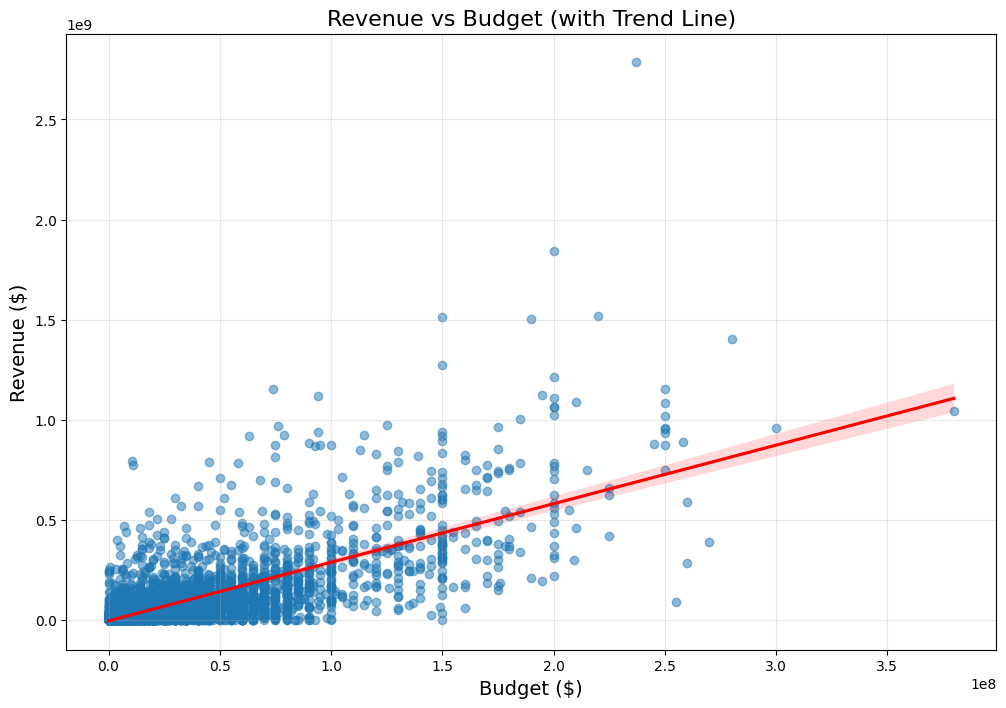

In [25]:
# Revenue vs Budgets : scatter plot
budget_revenue= df[['budget', 'revenue']].dropna()

#Plot the graph as a Scatter Plot
plt.figure(figsize=(12, 8))
sns.regplot(
    data = budget_revenue,
    x = 'budget',
    y = 'revenue',
    scatter_kws = {'alpha': 0.5},
    line_kws = {'color': 'red'}
)
plt.title('Revenue vs Budget (with Trend Line)', fontsize=16)
plt.xlabel('Budget ($)', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


#####2. **Revenue distribution over years**
**KEY INSIGHTS** *italicised text*
> Revenues were modest in the early 1900s, reflecting the early stage of the film industry and its limited audience reach.

> The rise in the 1930s coincides with the advent of sound in cinema and the growth of Hollywood as a cultural powerhouse.

> The decline from the 1930s to the 1960s could be due to the Great Depression, World War II, and the rise of television, which diverted audiences away from theaters.

> From the 1970s onward, steady growth reflects advancements in technology, global distribution, and blockbuster filmmaking, with the 2010s experiencing a significant surge due to digital streaming.

In [30]:
# Revenue distribution over decades
# Step 1: extract the year from the release_date column
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year  # Extract year

# Step 2: Create a column for decades
df['decade'] = (df['release_year'] // 10) * 10

# Step 3: Group Revenues by Decade
decade_revenue = df.groupby('decade')['revenue'].mean()


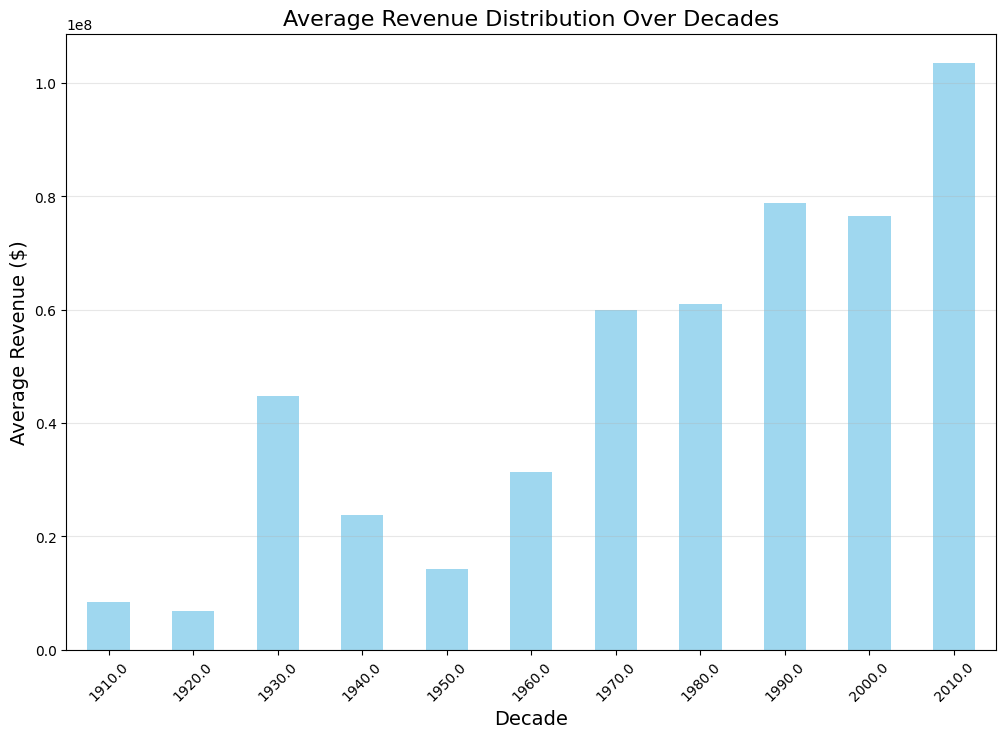

In [31]:
#%% [markdown]
# Create a bar chart
plt.figure(figsize=(12, 8))
decade_revenue.plot(
    kind='bar',
    color='skyblue',
    alpha=0.8
)
plt.title('Average Revenue Distribution Over Decades', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Revenue ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

#####3. **Runtime and Revenue**

> Movies with runtimes between 130 and 200 minutes tend to generate higher revenues, with a notable peak around 180 minutes.

> Beyond the 200-minute mark, revenues decline significantly, indicating that excessively long movies are generally less profitable.

> This suggests that audiences prefer films within the 140–200-minute range, likely reflecting an optimal balance between engagement and attention span.

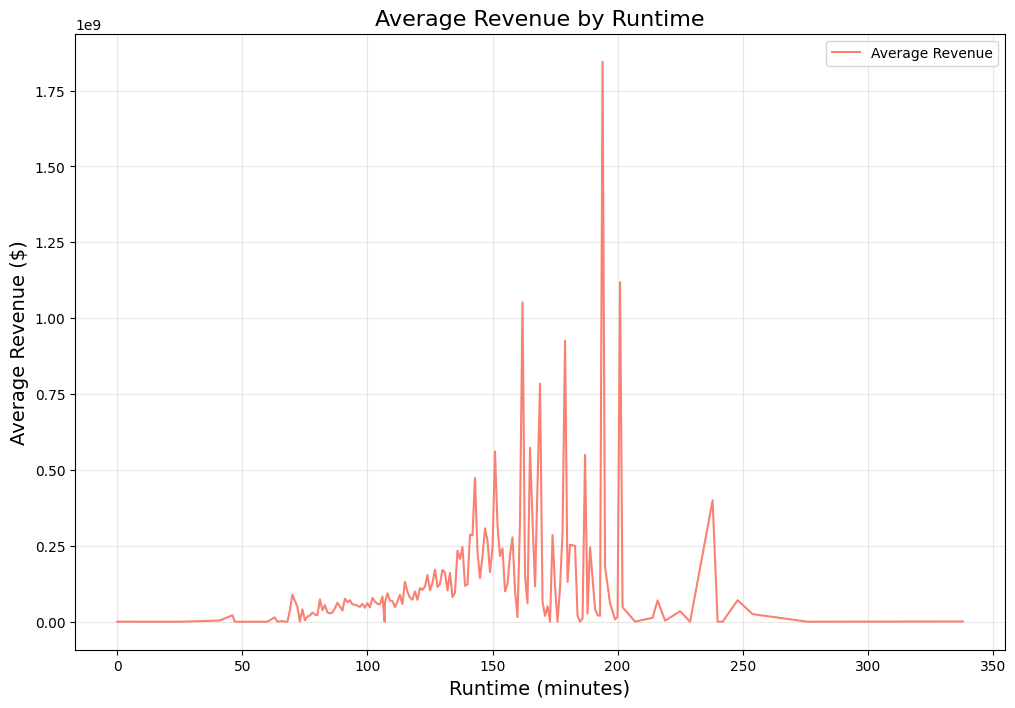

In [37]:
# Runtime vs Revenue
df_runtime_revenue = df[['runtime', 'revenue']].dropna()

# We'll be considering a Line Plot to show the relationship between Average Revenue and Runtime
# Group by runtime and calculate average revenue
avg_revenue_by_runtime = df_runtime_revenue.groupby('runtime')['revenue'].mean()

plt.figure(figsize=(12, 8))
avg_revenue_by_runtime.plot(
    kind='line',
    color='salmon',
    label='Average Revenue'
)
plt.title('Average Revenue by Runtime', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Average Revenue ($)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Key insights


### Average Budgets and Profits by Genre

##### Budgets
* Animation: 65,000,000
* Adventure: 65,000,000
* Fantasy: 62,000,000
* Science Fiction: 50,000,000
* Action: 50,000,000
  
##### Profits

* Animation: 160,000,000
* Adventure: 140,000,000
* Fantasy: 130,000,000
* Science Fiction: 100,000,000
* Action: 90,000,000

> The visualisations show a trend in movie budgets and profitability across genres. **Animation** and **Adventure** movies lead in terms of average budgets and profits, with Animation having an average profit of 160 million despite its relatively modest average budget of 65 million.

> On the other hand, genres like Action, while enjoying large budgets (averaging 50 million), comparatively bring lower profits (90 million), indicating a smaller return on investment.

>There is a good explanation about why certain genres have high budgets, genres like animations and fantasy require higher budgets due to the extensive use of special effects, these movies are also often large scale productions.

>These movies also bring in a significant amount of profit making them highly rewarded investments, this is due to the fact that these movies appeal to a broad audience.

>On the other hand **Action** movies generally rely on big-name actors and they tend to have high marketing budgets, therefore they aren't as profitable. Profitability could also be due to the highly saturated market.


##### Key Takeaways
1. **Animation’s Dominance**: Animation movies demonstrate the best return on investment among high-budget genres, suggesting that their broad appeal and marketability make them a safe bet for studios.
2. **Action movies significantly underperform**: Despite having high budgets, Action films lag behind in profitability compared to genres like Fantasy or Science Fiction. This could suggest competition within the oversaturated market.

In [ ]:
# In order to workout the profitability by genres we must explode the list.
exploded_genres = df.explode('genres')

# Making a new column for profit and working out the average profit
df['profit'] = df['revenue'] - df['budget']

# Group by genres and workout average budget and profit across genres
avg_budget = exploded_genres.groupby('genres')['budget'].mean().sort_values(ascending=False)
avg_profit = exploded_genres.groupby('genres')['profit'].mean().sort_values(ascending=False)

C:\Users\hinaf\AppData\Local\Temp\ipykernel_4480\2820788396.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


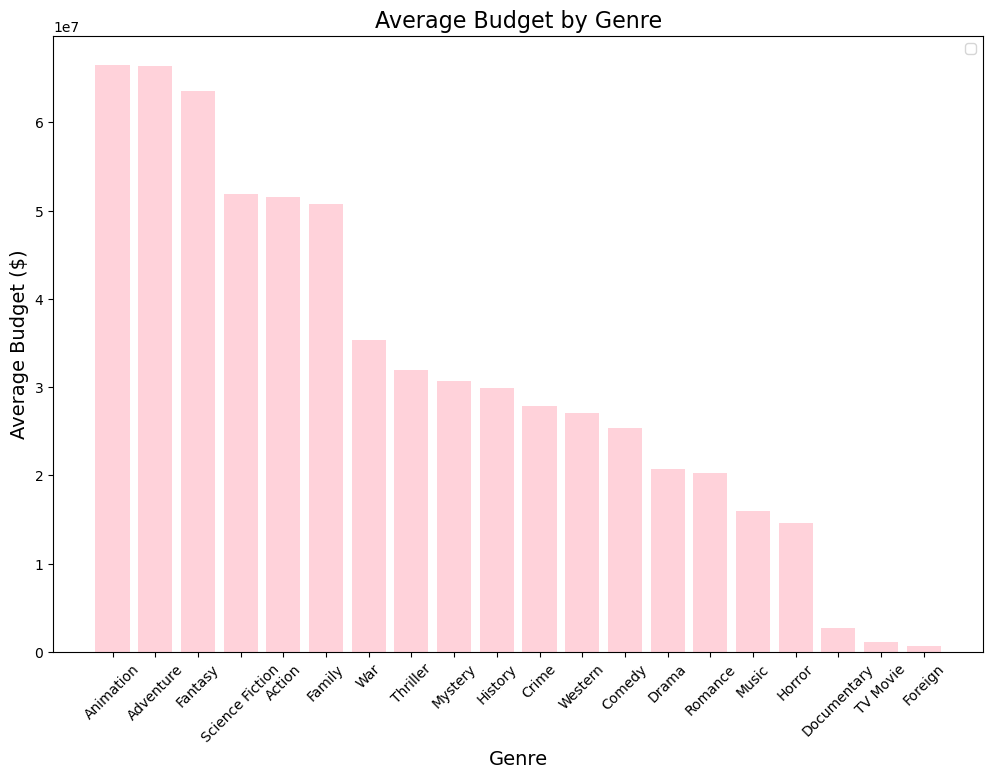

In [ ]:
# Visualization: Average Budget by Genre
plt.figure(figsize=(12, 8))
plt.bar(
    avg_budget.index,
    avg_budget.values,
    color = 'pink',
    alpha = 0.7
)
plt.xlabel(
    'Genre',
    fontsize = 14
)
plt.ylabel(
    'Average Budget ($)',
    fontsize = 14
)
plt.title(
    'Average Budget by Genre',
    fontsize = 16)
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\hinaf\AppData\Local\Temp\ipykernel_4480\2797585867.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


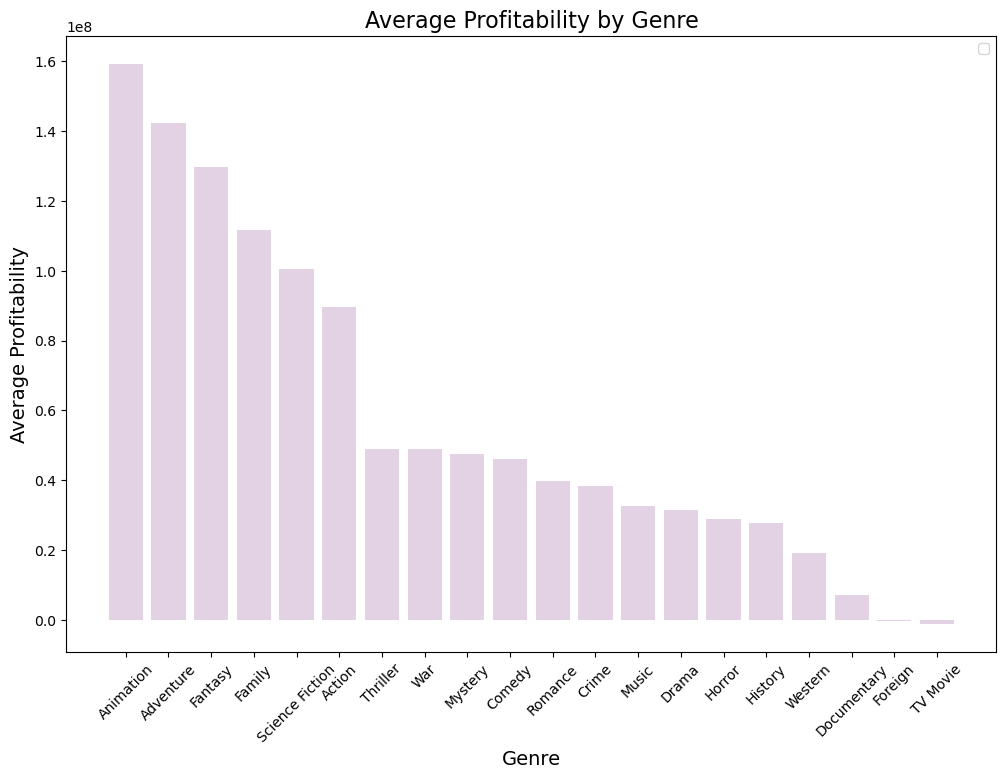

In [ ]:
# Visualization: Average Profitability by Genre
plt.figure(figsize=(12, 8))
plt.bar(
    avg_profit.index,
    avg_profit.values,
    color = 'thistle',
    alpha = 0.7
)
plt.xlabel(
    'Genre',
    fontsize = 14
)
plt.ylabel(
    'Average Profitability',
    fontsize = 14
)
plt.title(
    'Average Profitability by Genre',
    fontsize = 16
)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Revenue Disparity Across Countries
> At first glance its pretty the revenue disparity is pretty clear as the USA outperforms every other country by a mile bringing in  \$360 Billion whilst the second_highest country, the UK, is only bringing in about 600 Million.

> This is most likely due to the fact that our database is heavily skewed towards US produced movies, as they make up the vast majority of the entries.

> However we discover an interesting insight when we consider average revenue per movie.
> The US despite leading in revenues surprisingly doesn't even make it to top 10, in fact none of the top 5 revenue generating countries appear in the top 10.

> This mostly is due to countries like Dominica, Jamaica and Malta, producing far fewer movies where a single high performing film can dramatically boost their average revenues.

> This however, is not the case in the US, where the sheer volume of films dilutes their total per-movie average.


**This highlights how not just production volume but also market size can impact revenues.**

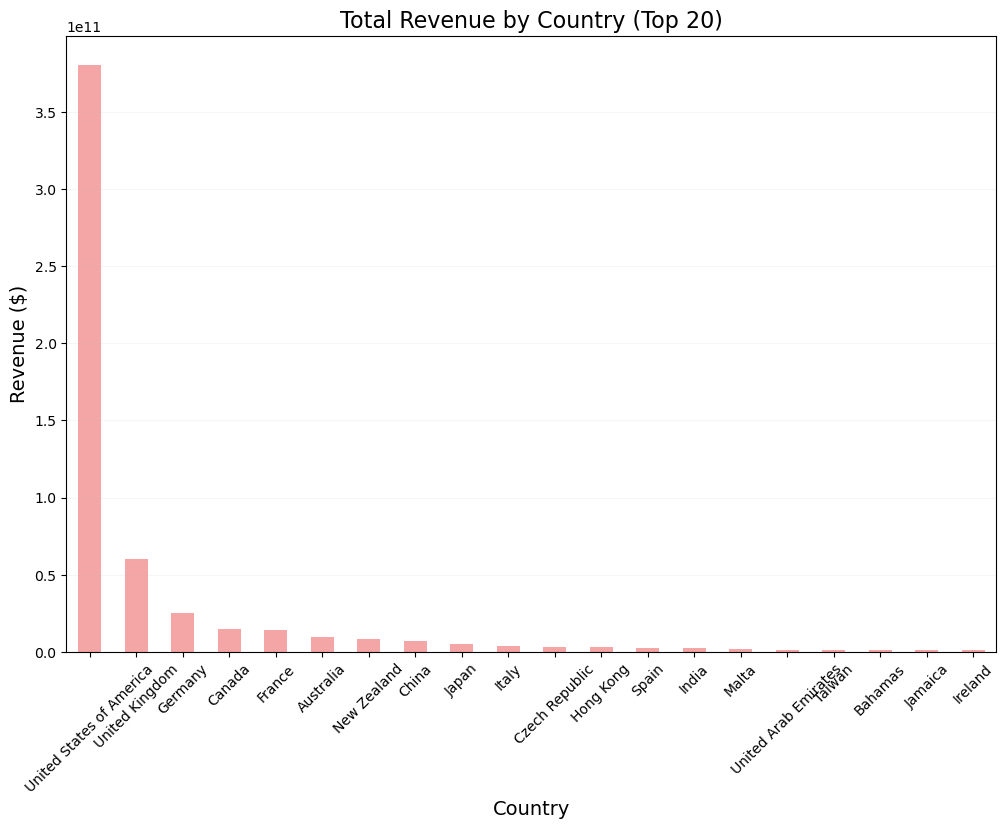

In [ ]:
movies = df.dropna(subset=['production_countries', 'revenue'])
# Step 1: explode the lists in the countries column
exploded_films = df.explode('production_countries')

# Step 2: Total revenue per country
revenue_per_country = exploded_films.groupby('production_countries')['revenue'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
revenue_per_country.plot(
    kind = 'bar',
    color = 'lightcoral',
    alpha = 0.7
)
plt.title('Total Revenue by Country (Top 20)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(rotation = 45)
plt.grid(axis='y', alpha = 0.1)
plt.show()


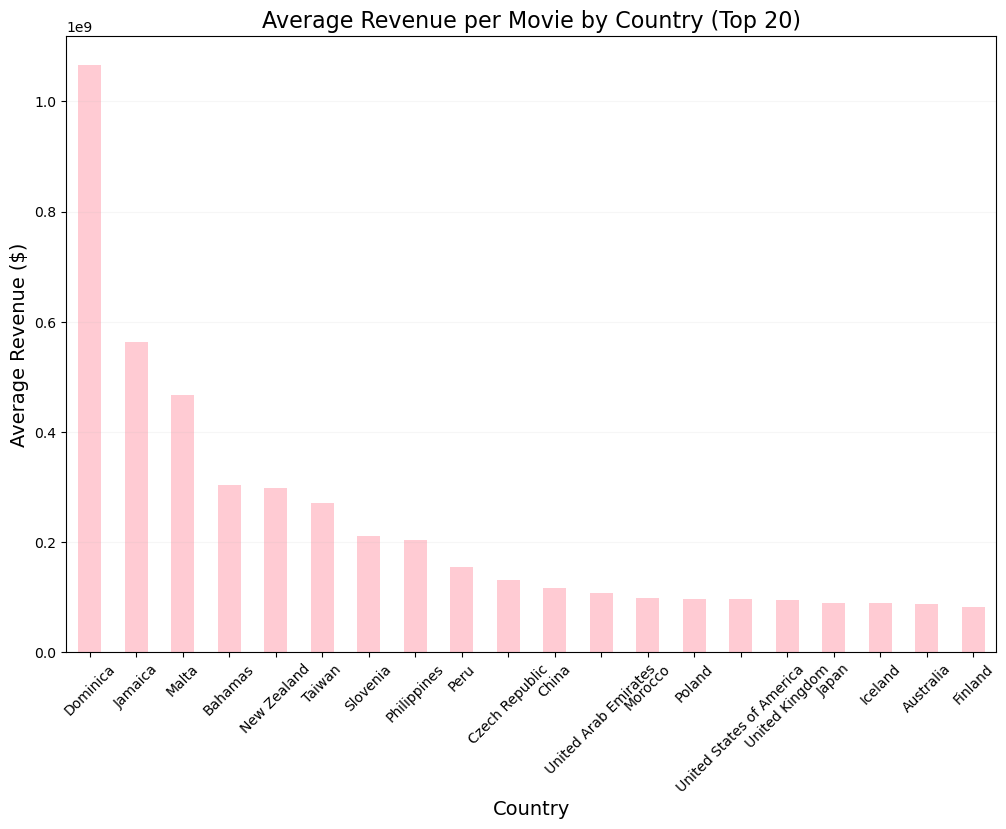

In [ ]:
# Visualize Top 20 Countries by Average Revenue
top_20_countries = normalized_revenue.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_20_countries.plot(
    kind = 'bar',
    color = 'lightpink',
    alpha = 0.7
)
plt.title('Average Revenue per Movie by Country (Top 20)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Revenue ($)', fontsize=14)
plt.xticks(rotation = 45)
plt.grid(axis='y', alpha = 0.1)
plt.show()


# In-depth single observation analysis

### Compare the 2 batman movies with eachother

Whilst exploring the data I realised we have 2 movies in our database witht the same name **Batman**.
I chose this movie solely for the purpose of comparing the 2 movies that are supposedly similar, to see how they performed.

### **Batman 1989:**

#### Key Details:
- **Budget:** \$35,000,000
- **Revenue:** \$411,348,924
- **Profit:** \$376,348,924
- **Popularity score:** 44.10
- **Vote average::** 7.0

#### Analysis of 1989 Movie

> The 1989 Batman proved to be a **highly successful investment**. With a budget of **\$35M**, the movie brought **\$411M** in revenue, and **\$376M** in profits achieveing a **10.7x return on investment**.

> The movie featured the iconic storyline but with a much darker theme to it.

> The popularity score reflects the movie's appeal and its lasting influence as this movie paved the way for future superhero movies.

#### Comparison to the 1966 Batman Movie

| Feature                    | 1989 Batman                           | 1966 Batman                             |
|----------------------------|---------------------------------------|-----------------------------------------|
| **Budget**                 | 35,000,000                          | 1,377,800                              |
| **Revenue (Profit)**       | 376,348,924                         | -1,377,800 (Loss)                      |
| **Genres**                 | Fantasy, Action                      | Family, Adventure, Comedy, Sci-Fi, Crime |
| **Popularity Score**       | 44.10                                | 9.81                                    |
| **Vote Average**           | 7.0                                  | 6.1                                     |
| **Tone**                   | Dark, Gothic, Serious                | Lighthearted, Campy, Comic Book Style   |
| **Cultural Context**       | Paved the way for darker superhero films | Embodied the classic campy, family-friendly style of its era |

---

#### Insights from Comparison
1. **Budget and Profitability:**
   - The **1989 Batman movie** was made on a significantly higher budget and brought in massive profits. In contrast, the **1966 Batman movie** despite having a low budget incurred a **net loss**.
   - The profitability of the 1989 Batman highlights the changing audience tastes and improved production scale.

2. **Tone and Genre:**
   - The **1989 Batman** reinvented the superhero genre, moving away from the lighthearted tones used in the 1966 movie, targeted mainly towards children. This movie had a darker and more serious narrative which appealed to a broader audience, superhero movies were no longer just for children.

4. **Genre Complexity:**
   - The **1966 movie focused on multiple genres (Family, Comedy, Sci-Fi)**.
   - The **1989 movie's focus on Fantasy and Action** set the standards for all future superhero movies as well as playing into Batman's core appeal.

#### Summary
The **1989 Batman movie** set a new standard for superhero films and redefined a classic character for new audiences. In contrast, the **1966 movie**, while iconic in its era, struggled to resonate commercially or critically at the same scale. Both films highlight evolving audience preferences and the superhero genre's growth over decades.

In [ ]:
# Getting movies that share a title
df[['title', 'id', 'release_date']].value_counts()[df[['title']].value_counts() > 1]

title            id     release_date
Out of the Blue  10844  2006-10-12      1
                 39269  1980-05-01      1
The Host         72710  2013-03-22      1
                 1255   2006-07-27      1
Batman           2661   1966-07-30      1
                 268    1989-06-23      1
Name: count, dtype: int64

In [ ]:
# Step 1: Grab the data for the movies you want to use
df[df['title'] == 'Batman']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,profit_difference,profit_difference_l,profit,release_year,decade
1359,35000000,"[Fantasy, Action]",NaN,268,"[double life, dc comics, dual identity, chemic...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[PolyGram Filmed Entertainment, The Guber-Pete...",...,Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096,376348924,376348924,376348924,1989.0,1980.0
4267,1377800,"[Family, Adventure, Comedy, Science Fiction, C...",NaN,2661,"[submarine, dc comics, missile, shark attack, ...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[Twentieth Century Fox Film Corporation, DC Co...",...,Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,-1377800,-1377800,-1377800,1966.0,1960.0


## Highest vs Lowest Revenue movie

### **Avatar (2009)**

> Avatar 2009 is a highly successful Sci-fi movie which has a wide variety of themes going on in the movie, an example being space warfare. This makes the movie appealing to a wider audience.

> Additionally to the wider appeal the movie comprises of amazing visual effects which helped the movie become a global hit.

> This movie became the highest-grossing movie of all time (until *Avengers: Endgame* surpassed it in 2019). It grossed over **\$2.78 billion**, with a production budget of **\$237 million**.
  
#### The Lovers (2015)
> **Smaller-budget film**, similar to avatar it is a mix of genres such as action, sci-fi and romance as well as involving time travel.

> Despite this movie having a similar genre profile to Avatar, this movie suffered from extremely low popularity and grossed **\$0**.
---

#### 2. **Key Comparisons:**

| **Attribute**              | **Avatar (2009)**                        | **The Lovers (2015)**                          |
|----------------------------|------------------------------------------|-----------------------------------------------|
| **Budget**                 | 237,000,000                             | 27,000,000                                   |
| **Revenue**                | 2,787,965,087                           | 0                                            |
| **Genres**                 | Action, Adventure, Fantasy, Science Fiction | Action, Adventure, Science Fiction, Romance   |
| **Vote Average**           | 7.2                                      | 4.8                                           |
| **Vote Count**             | 11,800                                    | 34                                            |
| **Profit**                 | 2,550,965,087                           | -27,000,000                                  |
| **Production Countries**   | USA, UK                                  | Australia, Belgium, India                     |
| **Release Year**           | 2009                                     | 2015                                          |
| **Tagline**                | "Enter the World of Pandora."            | "Love is longer than life."                   |
| **Popularity**             | 150.44                                   | 2.42                                          |

---

**Insights from comparison:**

**1. Budget vs. Revenue:**
- **Avatar** had a significantly larger budget of **\$237 million**, but the movie's visual effects and uniqueness helped it earn over **\$2.78 billion** globally, bringing in a profit of around **\$2.55 billion**.
  
- **The Lovers**, on the other hand, had a **\$27 million** budget, and it grossed **\$0** in revenue, making it a complete financial failure. This stark contrast highlights how the scale of investment, along with audience demand and quality of production, can determine a film’s financial success.

#### Summary
The two movies show how even movies with similar genre and themes can have vastly different levels of success, based on factors such as budgets, audiences and marketing.

In [ ]:
# Finding the highest revenue movie
df.loc[df['revenue'].idxmax()]


budget                                                          237000000
genres                      [Action, Adventure, Fantasy, Science Fiction]
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [culture clash, future, space war, space colon...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [Ingenious Film Partners, Twentieth Century Fo...
production_countries           [United States of America, United Kingdom]
release_date                                          2009-12-10 00:00:00
revenue                                                        2787965087
runtime                               

In [ ]:
# Finding the lowest revenue movie
df.loc[df['revenue'].idxmin()]

budget                                                           27000000
genres                      [Action, Adventure, Science Fiction, Romance]
homepage                                                              NaN
id                                                                  79698
keywords                                                               []
original_language                                                      en
original_title                                                 The Lovers
overview                The Lovers is an epic romance time travel adve...
popularity                                                       2.418535
production_companies    [Corsan, Bliss Media, Limelight International ...
production_countries                          [Australia, Belgium, India]
release_date                                          2015-02-13 00:00:00
revenue                                                                 0
runtime                               